📁 Please upload your dataset CSV file:


Saving 6. Predict Employee Attrition.csv to 6. Predict Employee Attrition (2).csv


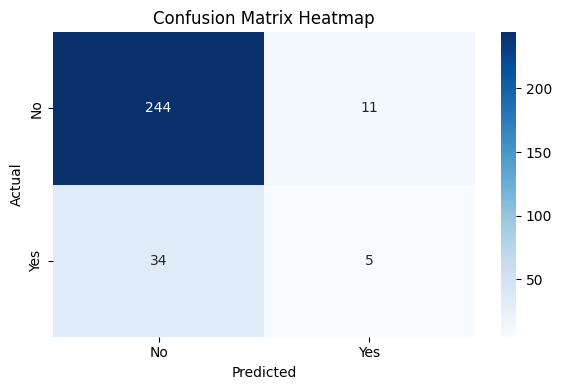

✅ Accuracy: 84.69%
✅ Precision: 31.25%
✅ Recall: 12.82%


In [3]:
# 1. Importing required libraries
import pandas as pd                             # For reading and manipulating CSV data
import seaborn as sns                           # For creating the confusion matrix heatmap
import matplotlib.pyplot as plt                 # For general plotting
from sklearn.model_selection import train_test_split    # For splitting data into training and testing sets
from sklearn.preprocessing import LabelEncoder           # For encoding categorical variables into numbers
from sklearn.ensemble import RandomForestClassifier      # For creating a Random Forest classification model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score  # For model evaluation
from google.colab import files                          # To enable file upload in Google Colab

# 2. Uploading the CSV file
print("📁 Please upload your dataset CSV file:") # Prompt user to upload file
uploaded = files.upload()                        # Opens file uploader dialog in Google Colab

# 3. Reading the uploaded file into a DataFrame
for file_name in uploaded.keys():                # Loop through uploaded files
    df = pd.read_csv(file_name)                  # Load the first uploaded file into a pandas DataFrame

# 4. Dropping irrelevant columns if present
irrelevant_columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']  # Columns not useful for prediction
df.drop(columns=[col for col in irrelevant_columns if col in df.columns], inplace=True)  # Drop those columns safely

# 5. Encoding categorical variables
label_encoders = {}                              # Dictionary to store encoders for each column
for col in df.select_dtypes(include='object').columns:  # Loop through categorical columns
    le = LabelEncoder()                          # Create a new label encoder
    df[col] = le.fit_transform(df[col])          # Fit and transform the column into numeric values
    label_encoders[col] = le                     # Save encoder in case we want to reverse it later

# 6. Selecting important features for prediction
selected_features = [
    'JobSatisfaction',                           # Employee satisfaction with job
    'MonthlyIncome',                             # Employee salary
    'EnvironmentSatisfaction',                   # Satisfaction with work environment
    'WorkLifeBalance',                           # Perception of work-life balance
    'TotalWorkingYears',                         # Total working experience in years
    'YearsAtCompany'                             # Number of years in current company
]

X = df[selected_features]                        # Independent variables (features)
y = df['Attrition']                              # Target variable: 1 if employee left, 0 otherwise

# 7. Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% train, 20% test

# 8. Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)  # Create a Random Forest model
model.fit(X_train, y_train)                      # Train the model using training data

# 9. Making predictions on test data
y_pred = model.predict(X_test)                   # Predict attrition on unseen (test) data

# 10. Evaluating the model
accuracy = accuracy_score(y_test, y_pred)        # Calculate the accuracy score
precision = precision_score(y_test, y_pred)      # Calculate precision: TP / (TP + FP)
recall = recall_score(y_test, y_pred)            # Calculate recall: TP / (TP + FN)

# 11. Creating and displaying confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)            # Generate confusion matrix from predictions
plt.figure(figsize=(6, 4))                       # Set figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
         # Set y-axis labels
plt.title("Confusion Matrix Heatmap")            # Add title
plt.xlabel("Predicted")                          # Label for x-axis
plt.ylabel("Actual")                             # Label for y-axis
plt.tight_layout()                               # Adjust layout to avoid overlap
plt.show()                                       # Display the plot

# 12. Printing final evaluation results
print(f"✅ Accuracy: {accuracy * 100:.2f}%")      # Display accuracy in percentage
print(f"✅ Precision: {precision * 100:.2f}%")    # Display precision in percentage
print(f"✅ Recall: {recall * 100:.2f}%")          # Display recall in percentage
